<a href="https://colab.research.google.com/github/slupok/DataMining/blob/main/two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd

init_data = pd.read_csv('/content/WineQT.csv')
init_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [59]:
init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [60]:
init_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [61]:
data = init_data.drop(['quality', 'Id'], axis=1)
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [62]:
from sklearn.preprocessing import scale
data = scale(data)
data

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


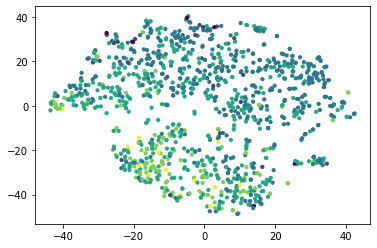

In [63]:
#TSNE
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=30, random_state=2)
transformed = model.fit_transform(data)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=init_data['quality'], s=10)
plt.show()

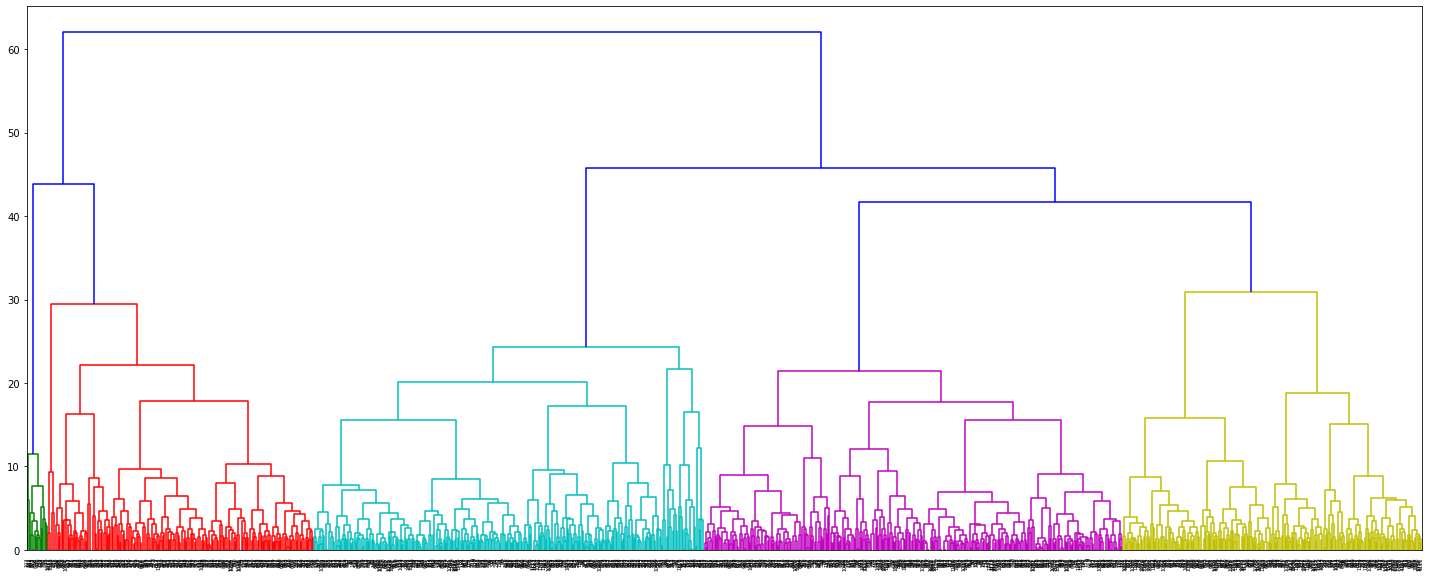

In [64]:
#Дендограмма
from scipy.cluster.hierarchy import linkage, dendrogram
fig = plt.figure(figsize = (25, 10))

mergings_ward = linkage(data, method='ward')
dendrogram(mergings_ward, color_threshold=35)
plt.show()

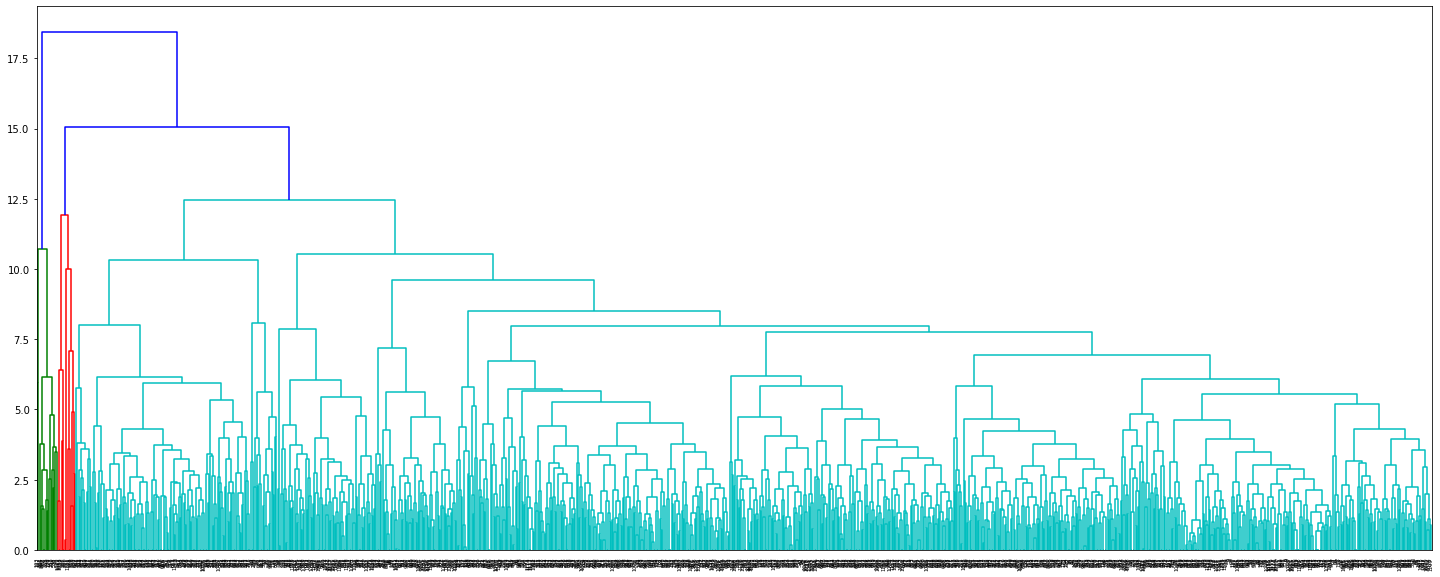

In [65]:
fig = plt.figure(figsize = (25, 10))
mergings_complete = linkage(data, 'complete')
dendrogram(mergings_complete, color_threshold = 13)
plt.show()

In [66]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(data)
metrics.silhouette_score(data, y_hc, metric='euclidean')

0.12957587441686894

In [67]:
y_hc

array([1, 2, 2, ..., 1, 1, 1])

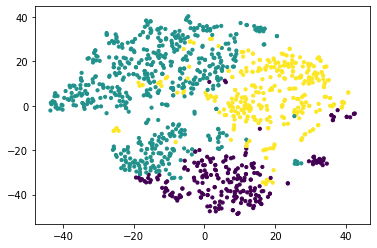

In [68]:
plt.scatter(x_axis, y_axis, c=y_hc, s=10)
plt.show()

In [69]:
hc = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_hc = hc.fit_predict(data)
metrics.silhouette_score(data, y_hc, metric='euclidean')

0.5028563558383045

In [70]:
y_hc

array([0, 0, 0, ..., 0, 0, 0])

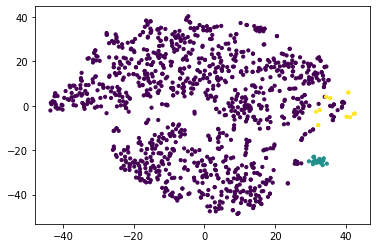

In [71]:
plt.scatter(x_axis, y_axis, c=y_hc, s=10)

In [72]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(data)

KMeans(n_clusters=3)

In [73]:
all_predictions = model.predict(data)
all_predictions

array([2, 0, 2, ..., 2, 2, 2], dtype=int32)

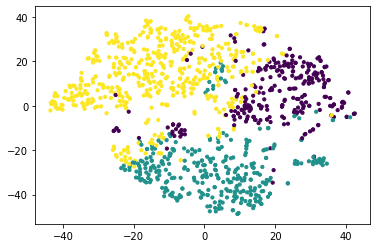

In [74]:
plt.scatter(x_axis, y_axis, c=all_predictions, s=10)
plt.show()

In [75]:
metrics.silhouette_score(data, all_predictions, metric='euclidean') 

0.18465869569884888

In [76]:
d = model.cluster_centers_

In [77]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.7)
dbscan.fit(data)
metrics.silhouette_score(data, dbscan.labels_)

0.21107511812983276

In [78]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

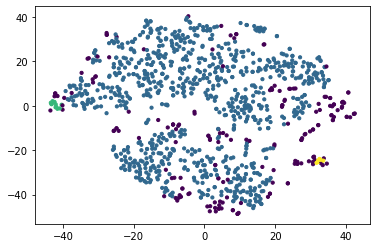

In [79]:
plt.scatter(x_axis, y_axis, c=dbscan.labels_, s=10)